In [11]:
import ailabtools.common as cms
cms.jpl_light()
cms.plt_light()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

import random

import ailabtools.statistic as st

In [19]:
total = 10000
xs = ['data_{:02d}'.format(i) for i in range(total)]
ys = [random.randint(0, 3)*2 for _ in range(total-4000)]
ys.extend([random.randint(3, 9) for _ in range(1000)])
ys.extend([random.randint(0, 9) for _ in range(3000)])

Sample sum: 10000


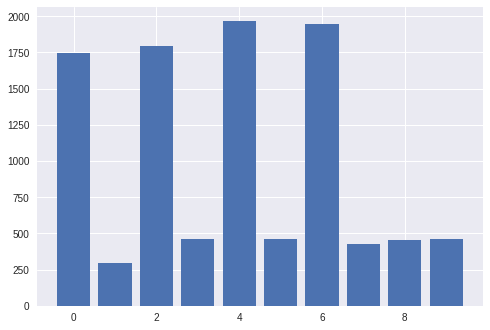

[1745, 295, 1796, 459, 1966, 458, 1943, 427, 452, 459]
(10, 'min:', 295, 'max:', 1966, 'std:', 708.2252466553279, 'mean:', 1000.0, 'median:', 459.0)


In [21]:
data_dic, keys, nums = st.statistic_data(xs, ys, title='Sample')

Sample Train sum: 7996


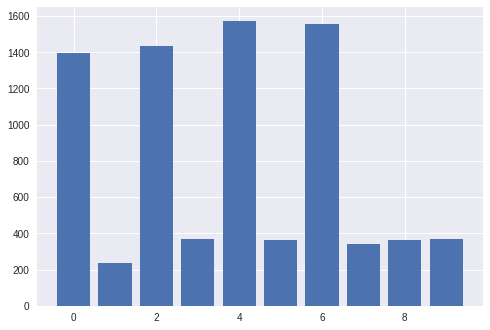

[1396, 236, 1436, 367, 1572, 366, 1554, 341, 361, 367]
(10, 'min:', 236, 'max:', 1572, 'std:', 566.4841039252557, 'mean:', 799.6, 'median:', 367.0)
Sample Val sum: 2004


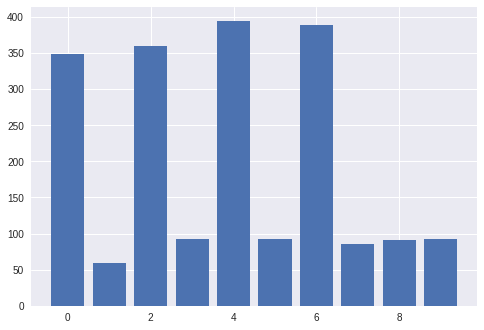

[349, 59, 360, 92, 394, 92, 389, 86, 91, 92]
(10, 'min:', 59, 'max:', 394, 'std:', 141.74145476888543, 'mean:', 200.4, 'median:', 92.0)


In [22]:
xs_train, ys_train, xs_val, ys_val = st.split_data(xs, ys, alpha=0.8)
data_dic_train, keys_train, nums_train = st.statistic_data(xs_train, ys_train, title='Sample Train')
data_dic_val, keys_val, nums_val = st.statistic_data(xs_val, ys_val, title='Sample Val')

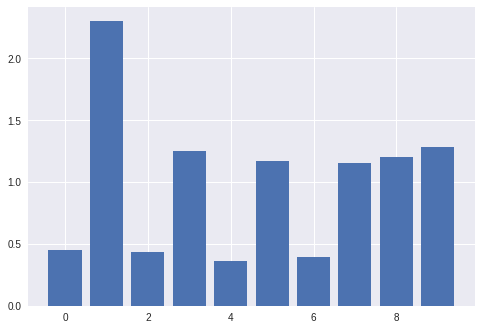

In [16]:
weights_dict = st.get_weight_dict(xs_train, ys_train, multiply=10)
ks = list(weights_dict.keys())
plt.bar(ks, [weights_dict[k] for k in ks])
plt.show()

before sum: 7996


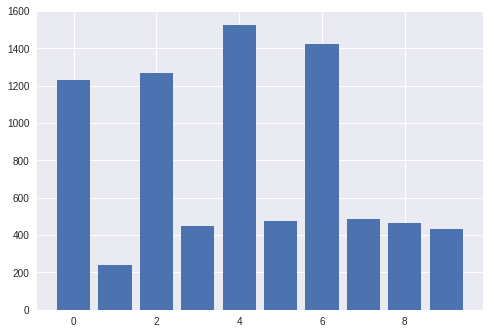

[1231, 242, 1270, 446, 1524, 476, 1424, 484, 464, 435]
(10, 'min:', 242, 'max:', 1524, 'std:', 469.8770477475996, 'mean:', 799.6, 'median:', 480.0)
after sum: 14035


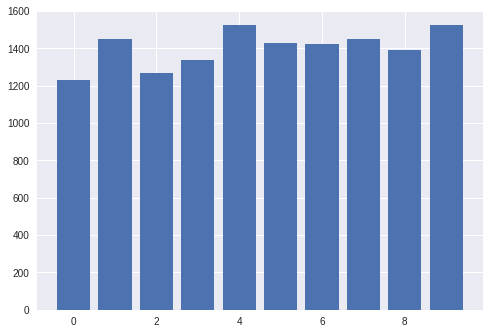

[1231, 1452, 1270, 1338, 1524, 1428, 1424, 1452, 1392, 1524]
(10, 'min:', 1231, 'max:', 1524, 'std:', 93.14853729393715, 'mean:', 1403.5, 'median:', 1426.0)


In [17]:
xs_train_up, ys_train_up = st.upsample_data(xs_train, ys_train)

Sample 0 sum: 3439


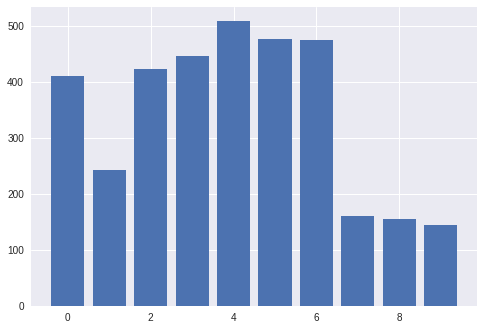

[410, 242, 423, 446, 508, 476, 474, 161, 154, 145]
(10, 'min:', 145, 'max:', 508, 'std:', 142.0615711584241, 'mean:', 343.9, 'median:', 416.5)
Sample 1 sum: 3439


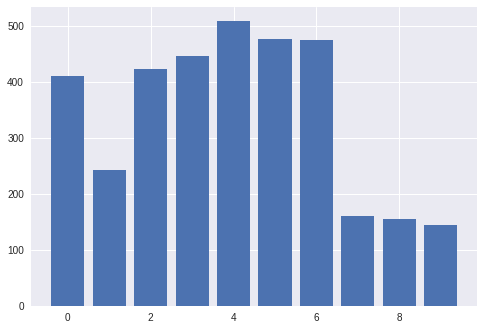

[410, 242, 423, 446, 508, 476, 474, 161, 154, 145]
(10, 'min:', 145, 'max:', 508, 'std:', 142.0615711584241, 'mean:', 343.9, 'median:', 416.5)
Sample 2 sum: 3446


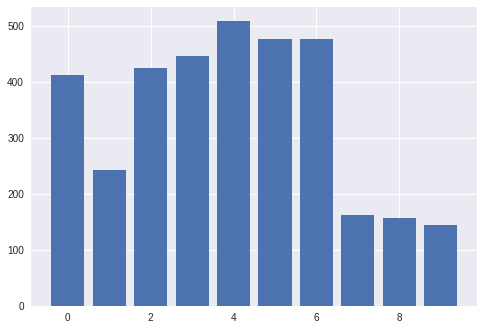

[411, 242, 424, 446, 508, 476, 476, 162, 156, 145]
(10, 'min:', 145, 'max:', 508, 'std:', 141.95294995173577, 'mean:', 344.6, 'median:', 417.5)


In [18]:
l_d = st.divide_data(xs_train, ys_train, chunk_num=3, keeps=[1,3,5])
for i, d in enumerate(l_d):
    x, y = st.convert_dict_to_pair(d)
    _,_,_ = st.statistic_data(x, y, title='Sample ' + str(i))